## 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_intersection(inner_radius1, outer_radius1, inner_radius2, outer_radius2, num_samples, center_x1, center_y1, center_x2, center_y2):
    # 采样半径和角度
    r1 = np.sqrt(np.random.uniform(inner_radius1**2, outer_radius1**2, num_samples))
    theta1 = np.random.uniform(0, 2*np.pi, num_samples)

    r2 = np.sqrt(np.random.uniform(inner_radius2**2, outer_radius2**2, num_samples))
    theta2 = np.random.uniform(0, 2*np.pi, num_samples)

    # 转换为笛卡尔坐标
    x1 = r1 * np.cos(theta1) + center_x1
    y1 = r1 * np.sin(theta1) + center_y1

    x2 = r2 * np.cos(theta2) + center_x2
    y2 = r2 * np.sin(theta2) + center_y2

    # 计算两个圆环的交集
    intersection_x = np.intersect1d(x1, x2)
    intersection_y = np.intersect1d(y1, y2)

    return intersection_x, intersection_y

# 设置内外半径和圆心
inner_radius1 = 1
outer_radius1 = 3
center_x1 = 0
center_y1 = 0

inner_radius2 = 2
outer_radius2 = 4
center_x2 = 0
center_y2 = 0

# 设置采样点数量
num_samples = 10000


points = set()

while len(points) < 10:
    intersection_x, intersection_y = sample_intersection(inner_radius1, outer_radius1, inner_radius2, outer_radius2, num_samples, center_x1, center_y1, center_x2, center_y2)
    points = points.union(zip(intersection_x, intersection_y))
    print(points)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_intersection(inner_radius1, outer_radius1, inner_radius2, outer_radius2, num_samples):
    # 采样半径和角度
    r = np.sqrt(np.random.uniform(max(inner_radius1, inner_radius2)**2, min(outer_radius1, outer_radius2)**2, num_samples))
    theta = np.random.uniform(0, 2*np.pi, num_samples)

    # 转换为笛卡尔坐标
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y

# 设置内外半径
inner_radius1 = 1
outer_radius1 = 3

inner_radius2 = 2
outer_radius2 = 4

# 设置采样点数量
num_samples = 10000

x, y = sample_intersection(inner_radius1, outer_radius1, inner_radius2, outer_radius2, num_samples)

# 绘制结果
plt.figure(figsize=(5,5))
plt.scatter(x, y, s=5)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_intersection(inner_radius1, outer_radius1, inner_radius2, outer_radius2, num_samples, center_x1, center_y1, center_x2, center_y2):
    # 采样半径和角度
    r = np.sqrt(np.random.uniform(max(inner_radius1, inner_radius2)**2, min(outer_radius1, outer_radius2)**2, num_samples))
    theta = np.random.uniform(0, 2*np.pi, num_samples)

    # 转换为笛卡尔坐标
    x = r * np.cos(theta) + center_x1
    y = r * np.sin(theta) + center_y1

    # 计算两个圆环的交集
    intersection_x = np.intersect1d(x + center_x1, x + center_x2)
    intersection_y = np.intersect1d(y + center_y1, y + center_y2)

    return intersection_x, intersection_y

# 设置内外半径和圆心
inner_radius1 = 1
outer_radius1 = 3
center_x1 = 0
center_y1 = 0

inner_radius2 = 2
outer_radius2 = 4
center_x2 = 0
center_y2 = 0

# 设置采样点数量
num_samples = 10000

x, y = sample_intersection(inner_radius1, outer_radius1, inner_radius2, outer_radius2, num_samples, center_x1, center_y1, center_x2, center_y2)

# 绘制结果
plt.figure(figsize=(5,5))
plt.scatter(x, y, s=5)
plt.show()


In [ ]:
len(x)

## 2

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import KDTree
import sys
sys.setrecursionlimit(2000)

# 初始化参数
width = 0.25  
height = 0.25  
radius = 5e-3  
min_distance = 12e-3  
max_distance = 18e-3  

# 初始化列表
# centers = [(5e-3, 5e-3)]  # 圆心坐标列表
centers = [(width/2-radius, height/2-radius), (width/2+radius, height/2+radius)]
tree = KDTree(centers)

distances = []  # 圆心距离列表

import numpy as np
import matplotlib.pyplot as plt

def sample_annulus(inner_radius, outer_radius, num_samples, center_x, center_y):
    r = np.sqrt(np.random.uniform(inner_radius**2, outer_radius**2, num_samples))
    theta = np.random.uniform(0, 2*np.pi, num_samples)
    # 转换为笛卡尔坐标
    x = r * np.cos(theta) + center_x
    y = r * np.sin(theta) + center_y
    return x, y


def dfs(idx=-1):
    global tree, min_distance, max_distance, centers
    if len(centers)>=300:
        return
    points = sample_annulus(min_distance, max_distance, 200, centers[idx][0], centers[idx][1] )
    # points = get_circle_points(center_x=centers[])
    points = np.array(points).T
    # indices = np.random.choice(points.shape[0], 200)
    end_center=centers[-1]
    sampled_points = points #[indices]
    for x, y in sampled_points:
        new_center = (x, y)
        dist, _ = tree.query(new_center)
        if (min_distance <= dist <= max_distance and radius <= x <= width-radius and radius <= y <= height-radius):
            centers.append(new_center)
            tree = KDTree(centers)
            print(f'Center Coordinate {len(centers)}', new_center)
    if end_center==centers[-1]:
        idx = np.random.randint(1,len(centers))
    dfs(idx)

dfs()


# 计算并记录所有圆心之间的距离
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        cx1, cy1 = centers[i]
        cx2, cy2 = centers[j]
        distance = np.sqrt((cx1 - cx2)**2 + (cy1 - cy2)**2)
        distances.append(distance)


plt.figure()
# 绘制距离的分布图（分布直方图）
plt.hist(distances)
# plt.savefig('histogram.png')
plt.show()

# 绘制所有的圆（可视化）
fig, ax = plt.subplots()
for center in centers:
    circle = plt.Circle(center, radius, fill=False)
    ax.add_artist(circle)
ax.set_xlim(0, width)
ax.set_ylim(0, height)
plt.gca().set_aspect('equal')
# fig.savefig('circles.png')
plt.show()

In [ ]:
# 初始化参数
width = 0.1  
height = 0.1  
radius = 5e-3  
min_distance = 12e-3  
max_distance = 18e-3  
# max_cnt = (width/(2*(radius)))**2
# min_cnt = (width/(2*(radius+max_distance)))**2
max_cnt = (width*height)/(np.pi*(radius**2))
min_cnt = (width*height)/(np.pi*((radius+max_distance)**2))
print(min_cnt, max_cnt)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 圆心和半径
center_x = 0
center_y = 0
radius = 1
def get_circle_points(center_x, center_y, radius, num_points):
    # 生成均匀分布的角度
    angles = np.linspace(0, 2*np.pi, num_points)
    # 计算每个点的坐标
    x = center_x + radius * np.cos(angles)
    y = center_y + radius * np.sin(angles)
    return [x,y]
# 绘制圆和点
plt.figure(figsize=(6,6))
plt.plot(x, y, 'o')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [ ]:
from collections import deque

def bfs(graph, start, end):
    queue = deque([[start]])
    visited = set([start])

    while queue:
        path = queue.popleft()
        vertex = path[-1]

        if vertex == end:
            return path

        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(path + [neighbour])

    return None

# 定义图结构
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# 执行广度优先搜索
path = bfs(graph, 'A', 'F')
print(path)


## 3

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import KDTree
import sys
sys.setrecursionlimit(2000)

# 初始化参数
width = 0.1  
height = 0.1  
radius = 5e-3  
min_distance = 12e-3  
max_distance = 18e-3  

def get_circle_points(center, radius, num_points, width=width, height=height):
    # 生成均匀分布的角度
    angles = np.linspace(0, 2*np.pi, num_points)
    # 计算每个点的坐标
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)

    circle_points = []

    for i in range(num_points-1):
        if (radius <= x[i] <= width-radius and radius <= y[i] <= height-radius):
            circle_points.append([x[i],y[i]])
    return circle_points

def get_points(centers, radius_cnt, radius=radius, num_points=24):
    points = []
    lev = 6e-3/radius_cnt
    for center in centers:
        for j in range(radius_cnt):
            circle_points = get_circle_points(center, 
                                    radius=radius+min_distance+j*lev,
                                    num_points=num_points+1)
            
            points.extend(circle_points)
    return points

In [ ]:
# 初始化列表
# centers = [(5e-3, 5e-3)]  # 圆心坐标列表
centers = [(width/2+min_distance, height/2+min_distance), 
           (width/2-2*min_distance, height/2-2*min_distance),
           (width/2+min_distance, height/2-min_distance),
           (width/2-min_distance, height/2+min_distance)]
tree = KDTree(centers)

distances = []  # 圆心距离列表

scores = []
def dfs():
    global scores, centers, tree, new_points, min_distance, max_distance, dist_old
    # new_points = []
    if not scores:
        dist_old, _ = tree.query(centers[0])
        idx = np.random.randint(1,len(centers)-1)
        points = get_points([centers[-1],centers[idx]], 60)
        new_points = points
    if new_points:
        scores = []
        mid_points = []    
        for p in new_points:
            dist, _ = tree.query(p)
            if (min_distance <= dist <= max_distance):
                dist_new = dist
                scores.append(abs(dist_new-dist_old))
                mid_points.append(p)
        new_points = mid_points
    if len(centers)>200 or not scores:
        scores = []
        return 1
    if scores:
        min_score = min(scores)
        min_score_idx = scores.index(min_score)
        new_center = new_points[min_score_idx]
        dist_old, _ = tree.query(new_center)
        centers.append(new_center)
        tree = KDTree(centers)
        print(f'Center Coordinate {len(centers)}', new_center)
        scores.remove(min_score)
        new_points.remove(new_center)
    dfs()
# dfs()

# 计算并记录所有圆心之间的距离
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        cx1, cy1 = centers[i]
        cx2, cy2 = centers[j]
        distance = np.sqrt((cx1 - cx2)**2 + (cy1 - cy2)**2)
        distances.append(distance)

plt.figure()
# 绘制距离的分布图（分布直方图）
plt.hist(distances, bins=20)
# plt.savefig('histogram.png')
plt.show()

# 绘制所有的圆（可视化）
fig, ax = plt.subplots()
for center in centers:
    circle = plt.Circle(center, radius, fill=False)
    ax.add_artist(circle)
ax.set_xlim(0, width)
ax.set_ylim(0, height)
plt.gca().set_aspect('equal')
# fig.savefig('circles.png')
plt.show()

In [ ]:
# 初始化列表
# centers = [(5e-3, 5e-3)]  # 圆心坐标列表
centers = [(width/2+min_distance, height/2+min_distance), 
           (width/2-2*min_distance, height/2-2*min_distance),
           (width/2+min_distance, height/2-min_distance),
           (width/2-min_distance, height/2+min_distance)]
tree = KDTree(centers)

distances = []  # 圆心距离列表

while len(centers)<100:
    dist_old, _ = tree.query(centers[0])
    idx = np.random.randint(1,len(centers)-1)
    points = get_points([centers[-1],centers[idx]], 60)
    scores = []
    new_points = []
    for p in points:
        dist, _ = tree.query(p)
        if (min_distance <= dist <= max_distance):
            dist_new = dist
            scores.append(dist_new-dist_old)
            new_points.append(p)
    if scores:
        min_score = min(scores)
        min_score_idx = scores.index(min_score)
        new_center = new_points[min_score_idx]
        dist_old, _ = tree.query(new_center)
        centers.append(new_center)
        tree = KDTree(centers)
        print(f'Center Coordinate {len(centers)}', new_center)

# 取每个中心点的最近领域点的距离
for i in range(len(centers)):
    dist, _ = tree.query(centers[i], k=2)
    distances.append(dist[1])

plt.figure()
# 绘制距离的分布图（分布直方图）
plt.hist(distances, bins=20)
# plt.savefig('histogram.png')
plt.show()

# 绘制所有的圆（可视化）
fig, ax = plt.subplots()
for center in centers:
    circle = plt.Circle(center, radius, fill=False)
    ax.add_artist(circle)
ax.set_xlim(0, width)
ax.set_ylim(0, height)
plt.gca().set_aspect('equal')
# fig.savefig('circles.png')
plt.show()

In [ ]:
dist_old, _ = tree.query(centers[0])
idx = np.random.randint(1,len(centers)-1)
c = [centers[-1], centers[idx]]
points = get_points(c, 10, num_points=10)
points = np.array(points)
print(len(points))
# 绘制所有的圆（可视化）
fig, ax = plt.subplots()
for center in c:
    circle = plt.Circle(center, radius, fill=False)
    ax.add_artist(circle)
plt.scatter(points[:,0], points[:,1])
# ax.set_xlim(0, width/1.5)
# ax.set_ylim(0, height/1.5)
plt.gca().set_aspect('equal')
# fig.savefig('circles.png')
plt.show()

## BFS

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import KDTree
import collections
import io
from PIL import Image

# 初始化参数
width = 120  
height = 120
radius = 5e-3  
min_distance = 12e-3  
max_distance = 18e-3  

# 初始化列表
# centers = [(5e-3, 5e-3)]  # 圆心坐标列表
# centers = [(width/2, height/2), (width/2-2*radius, height/2-2*radius), (width/2+2*radius, height/2+2*radius)]
# centers = [(width/2, height/2), (width/2-max_distance, height/2-max_distance)]
centers = [
            # (radius, radius), 
            (width-radius, height-radius),
            # (radius, height-radius),
            # (width-radius, radius),
            (width/2, height/2),
            # (width*3/4, height/2),
            # (width/2, height/4),
            # (width/4, height/4),
            # (width/2, height*3/4)
            ]
tree = KDTree(centers)

def im_show(distances, centers, cnt):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # 绘制距离的分布图（分布直方图）
    ax1.hist(distances, bins=80)
    ax1.set_title(f'Distance Distribution, {cnt} Centers')
    # 绘制所有的圆（可视化）
    
    ax2.set_xlim(0, width)
    ax2.set_ylim(0, height)
    ax2.set_aspect('equal')
    
    for center in centers:
        circle = plt.Circle(center, radius, fill=False)
        ax2.add_artist(circle)
    ax2.set_title('Circle Visualization')
    # if gif:
    img_buf = io.BytesIO()
    plt.savefig(img_buf,format='png')
    img = Image.open(img_buf)
    # imgs.append(img)
    return img
    # plt.show()

def sample_annulus(inner_radius, outer_radius, num_samples, centers):
    global tree 
    points = []
    for c in centers:
        r = np.sqrt(np.random.uniform(inner_radius**2, outer_radius**2, num_samples))
        theta = np.random.uniform(0, 2*np.pi, num_samples)
        # 转换为笛卡尔坐标
        x = r * np.cos(theta) + c[0]
        y = r * np.sin(theta) + c[1]
        for i in range(len(x)):
            new_center = (x[i], y[i])
            dist, _ = tree.query(new_center)
            if (min_distance <= dist <= max_distance 
                and radius <= x[i] <= width-radius 
                and radius <= y[i] <= height-radius):
                points.append(new_center)
    return np.array(points)

def get_dist_list(centers):
    distances = []
    for i in range(len(centers)):
        dist, _ = tree.query(centers[i], k=2)
        distances.append(dist[1])
    return distances

def get_point_hist_var(center_distance, points_distance):
    hist_vars = []
    for p in points_distance:
        # 计算直方图
        hist, bin_edges = np.histogram(center_distance+p, bins=80)
        # 计算直方图的方差
        hist_variance = np.var(hist)
        hist_vars.append(hist_variance)
    return hist_vars

def bfs(centers, cnt=300, sample_cnt=200):
    global tree, min_distance, max_distance
    queue = centers.copy()
    current_hist_var = 0
    # visited = set()
    # for c in centers:
    #     visited.add(c)
    imgs = []
    while queue:
        q_idx = np.random.randint(0, len(queue))
        ver = queue.pop(q_idx)
        idxs = np.random.randint(0, len(centers), 5)
        centers_choices = [centers[i] for i in idxs]
        # visited.add(c for c in choices)
        # visited.add(ver)
        # for c in centers_choices:
        points = sample_annulus(min_distance, max_distance, sample_cnt, centers_choices+list(centers))
        centers_dist = get_dist_list(centers)
        points_dist = get_dist_list(points)
        hist_vars = get_point_hist_var(centers_dist, points_dist)
        # if not points_scores.tolist():
        if not hist_vars:
            continue
        max_hist_var = max(hist_vars)
        if max_hist_var<current_hist_var:
            continue
        current_hist_var = max_hist_var
        max_hist_var_idx = hist_vars.index(max_hist_var)
        new_center = points[max_hist_var_idx].tolist()
        dist, _ = tree.query(new_center)
        if (min_distance <= dist <= max_distance):
            # new_center = points[min_score_idx].tolist()
            centers.append(new_center)
            tree = KDTree(centers)
            print(f'Center Coordinate {len(centers)}', new_center)
            queue.append(new_center)
            distances = get_dist_list(centers)
            imgs.append(im_show(distances, centers, len(centers)))
            if len(centers)>=cnt:
                return centers, imgs

    return centers, imgs
        
centers, imgs = bfs(centers, cnt=1000, sample_cnt=500)
distances = get_dist_list(centers)

# im_show(distances, centers)
imgs[0].save("process.gif",format='GIF',append_images=imgs,save_all=True,duration=100,loop=0)


## Choice min histgram

在取半径的时候将队列所有的中心点都输入，输出最小的半径和最小的中心点, 检查KDTree.query

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import KDTree
import collections
from PIL import Image
import io

width = 0.125  
height = 0.125  
radius = 5e-3  
min_distance = 12e-3  
max_distance = 18e-3  

centers = [
            # (width/2-max_distance, height/2-max_distance),
            # (width/2+max_distance, height/2+max_distance),
            # (width/2-max_distance, height/2+max_distance),
            # (width/2+max_distance, height/2-max_distance),
            (radius, radius), 
            (width-radius, height-radius),
            # (radius, height-radius),
            # (width-radius, radius),
            # (width/2, height/2),
            # (width*3/4, height/2),
            # (width/2, height/4),
            # (width/4, height/4),
            # (width/2, height*3/4)
            ]
tree = KDTree(centers)

def im_show(distances, centers, cnt, curent_var):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.hist(distances, bins=80, range=(min_distance, max_distance))
    ax1.set_title(f'Distance Distribution, {cnt} Centers')
    
    ax2.set_xlim(0, width)
    ax2.set_ylim(0, height)
    ax2.set_aspect('equal')
    
    for center in centers:
        circle = plt.Circle(center, radius, fill=False)
        ax2.add_artist(circle)
    ax2.set_title(f'Circle Visualization, var: {curent_var}')
    img_buf = io.BytesIO()
    plt.savefig(img_buf,format='png')
    img = Image.open(img_buf)
    return img

def get_dist_list(check_centers, k = 1):
    global centers
    if k ==1:
        distances, _ = tree.query(check_centers)
    elif k == 2:
        d, _ = tree.query(centers, k=2)
        distances = d[:,1]
    return distances.tolist()

def get_best_radius(center_dists, bins=80):
    min_hist_idxs = []
    hist, bin_edges = np.histogram(center_dists, range=(min_distance, max_distance),bins=bins)
    min_hist = min(hist)
    for i in range(len(hist)):
        if hist[i]==min_hist:
            min_hist_idxs.append(i)
    best_radius = bin_edges[min_hist_idxs] 
    return best_radius

def is_in_region(point):
    global tree, min_distance, max_distance, radius, width, height, centers
    dist, _ = tree.query(point)
    if (min_distance <= dist <= max_distance
        and radius <= point[0] <= width-radius
        and radius <= point[1] <= height-radius):
        return True
    return False

def sample_circle(radius, num_points, center):
    points = []
    c_idxs = []
    for i in range(len(center)):
        for r in radius:
            angles = np.linspace(0, 2*np.pi, num_points)
            x = r * np.cos(angles) + center[i][0]
            y = r * np.sin(angles) + center[i][1]
            p_set = np.column_stack((x, y))
            for p in p_set:
                if is_in_region(p):
                    points.append(p)
                    c_idxs.append(i)
    return points, c_idxs

# def get_point_hist_var(center_distance, points_distance):
#     all_distance = center_distance + points_distance
#     all_distance = np.array(all_distance)
#     # 计算平均值
#     mean = np.mean(all_distance)
#     # 计算每个数据点与平均值之差的绝对值
#     diff = np.abs(points_distance - mean)
#     # 计算总离差和
#     total_diff = np.sum(diff)
#     # 计算每个数据点的贡献率
#     scores = diff/total_diff
#     return scores.tolist()

def get_min_var_idx(points, c_idxs, bins=80):
    global centers
    center_dists = get_dist_list(centers, k=2)
    point_dists = get_dist_list(points)
    min_var = np.inf
    # max_var = 0
    p_idx = 0
    # hist_var = []
    for i in range(len(point_dists)):
        hist, _ = np.histogram(np.append(center_dists, point_dists[i]), range=(min_distance, max_distance),bins=bins)
        current_var = np.var(hist)
        if current_var<min_var:
            p_idx = i
            min_var = current_var
        # hist_var.append(current_var)
    # min_var = min(hist_var)
    # p_idxs = []
    # for i in range(len(hist_var)):
    #     if hist_var[i]==min_var:
    #         p_idxs.append(i)
    # p_idx = np.random.choice(p_idxs)
    c_idx = c_idxs[p_idx]
    return c_idx, p_idx
    

def bfs(centers, cnt=300, sample_cnt=20):
    global tree, min_distance, max_distance
    # queue = collections.deque()
    queue = centers.copy()
    # visited = set()
    # for i in range(len(centers)):
    #     queue.append(centers[i])
        # visited.add(centers[i])
    imgs = []
    min_var = 10000
    while queue:
        samples_radius = get_best_radius(get_dist_list(centers))
        points, c_idxs = sample_circle(samples_radius, sample_cnt, queue)
        if not points:
            continue
        c_idx, p_idx = get_min_var_idx(points, c_idxs)
        _ = queue.pop(c_idx)
        # idx = np.random.randint(0, len(points))
        p = points[p_idx]
        new_center = p.tolist()
        centers.append(new_center)
        distances = get_dist_list(centers, 2)
        imgs.append(im_show(distances, centers, len(centers), 0))
        tree = KDTree(centers)
        print(f'Center Coordinate {len(centers)}', new_center)
        queue.append(new_center)
        if len(centers)>=cnt:
            return centers, imgs
    return centers, imgs

centers, imgs = bfs(centers, cnt=150, sample_cnt=30)
distances = get_dist_list(centers, k=2)

im_show(distances, centers, len(centers), 0)
imgs[0].save("process.gif",format='GIF',append_images=imgs,save_all=True,duration=100,loop=0)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
circle = plt.Circle(p, r, fill=False)
ax1.add_artist(circle)
ax1.set_xlim(0, width)
ax1.set_ylim(0, height)
ax.set_aspect('equal')
plt.show()


## T

Center Coordinate 3 [0.014765613803780372, 0.012600882319534639]
Center Coordinate 4 [0.00913183547302248, 0.025444603225871817]


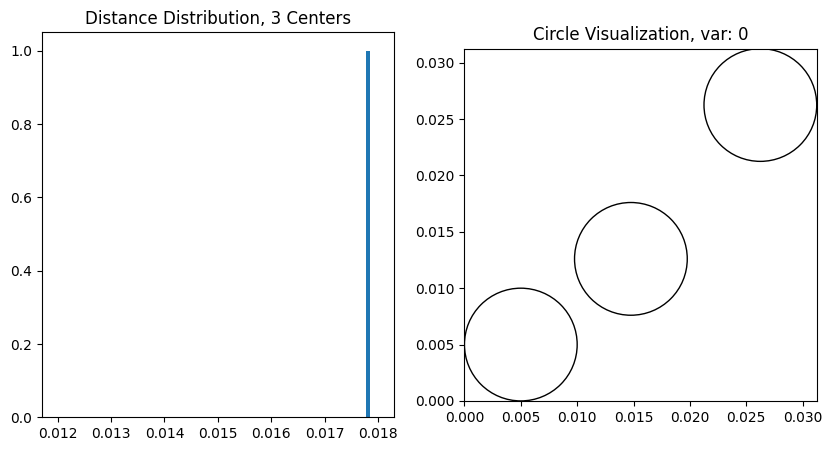

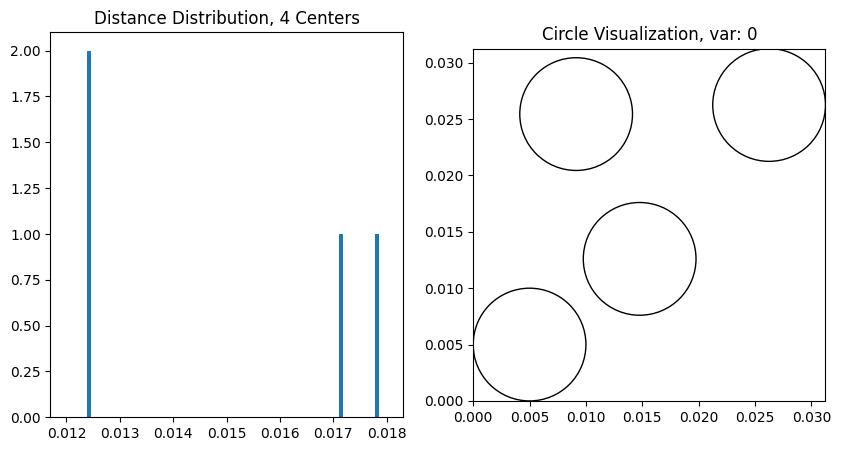

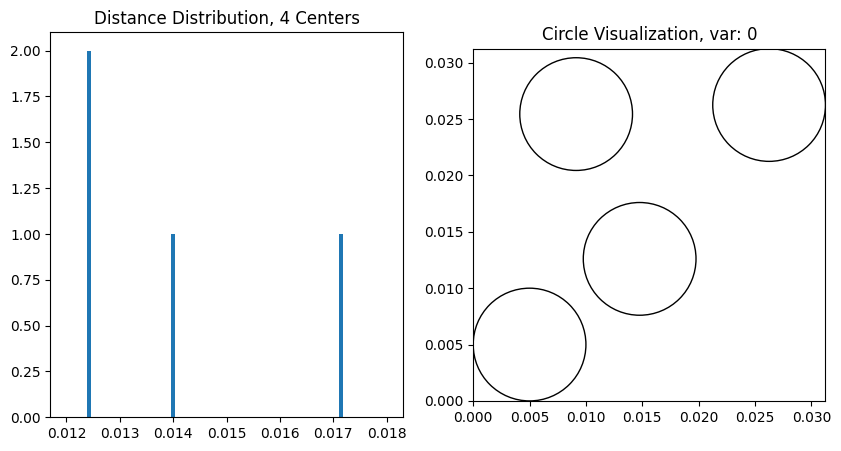

In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import KDTree
import collections
from PIL import Image
import io

width = 0.125 
height = 0.125  
radius = 5e-3  
min_distance = 12e-3  
max_distance = 18e-3  

centers = [
            # (width/2-max_distance, height/2-max_distance),
            # (width/2+max_distance, height/2+max_distance),
            # (width/2-max_distance, height/2+max_distance),
            # (width/2+max_distance, height/2-max_distance),
            (radius, radius), 
            (width-radius, height-radius),
            # (width-radius, radius),
            # (radius, height-radius),
            # (width/2, height/2),
            # (width*3/4, height/2),
            # (width/2, height/4),
            # (width/4, height/4),
            # (width/2, height*3/4)
            ]
tree = KDTree(centers)

def im_show(distances, centers, cnt, curent_var):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.hist(distances, bins=80, range=(min_distance, max_distance))
    ax1.set_title(f'Distance Distribution, {cnt} Centers')
    
    ax2.set_xlim(0, width)
    ax2.set_ylim(0, height)
    ax2.set_aspect('equal')
    
    for center in centers:
        circle = plt.Circle(center, radius, fill=False)
        ax2.add_artist(circle)
    ax2.set_title(f'Circle Visualization, var: {curent_var}')
    img_buf = io.BytesIO()
    plt.savefig(img_buf,format='png')
    img = Image.open(img_buf)
    return img

def get_dist_list(check_centers, k = 1):
    global centers
    if k ==1:
        distances, _ = tree.query(check_centers)
    elif k == 2:
        d, _ = tree.query(centers, k=2)
        distances = d[:,1]
    return distances.tolist()

def get_best_radius(center_dists, bins=80):
    min_hist_idxs = []
    hist, bin_edges = np.histogram(center_dists, range=(min_distance, max_distance),bins=bins)
    min_hist = min(hist)
    for i in range(len(hist)):
        if hist[i]==min_hist:
            min_hist_idxs.append(i)
    best_radius = bin_edges[min_hist_idxs] 
    return best_radius

def is_in_region(point):
    global tree, min_distance, max_distance, radius, width, height, centers
    dist, _ = tree.query(point)
    if (min_distance <= dist <= max_distance
        and radius <= point[0] <= width-radius
        and radius <= point[1] <= height-radius):
        return True
    return False

def sample_circle(radius, num_points, center):
    points = []
    c_idxs = []
    for i in range(len(center)):
        for r in radius:
            angles = np.linspace(0, 2*np.pi, num_points)
            x = r * np.cos(angles) + center[i][0]
            y = r * np.sin(angles) + center[i][1]
            p_set = np.column_stack((x, y))
            for p in p_set:
                if is_in_region(p):
                    points.append(p)
                    c_idxs.append(i)
    return points, c_idxs

def get_min_var_idx(points, c_idxs, bins=20):
    global centers
    center_dists = get_dist_list(centers, k=2)
    point_dists = get_dist_list(points)
    hist_var = []
    for i in range(len(point_dists)):
        hist, _ = np.histogram(np.append(center_dists, point_dists[i]), range=(min_distance, max_distance),bins=bins)
        current_var = np.var(hist)
        hist_var.append(current_var)
    min_var = min(hist_var)
    p_idxs = []
    for i in range(len(hist_var)):
        if hist_var[i]==min_var:
            p_idxs.append(i)
    p_idx = np.random.choice(p_idxs)
    c_idx = c_idxs[p_idx]
    return c_idx, p_idx
    

def bfs(centers, cnt=1000, sample_cnt=50):
    global tree, min_distance, max_distance
    queue = centers.copy()
    imgs = []
    while queue:
        samples_radius = get_best_radius(get_dist_list(centers))
        points, c_idxs = sample_circle(samples_radius, sample_cnt, queue)
        if not points:
            break
        c_idx, p_idx = get_min_var_idx(points, c_idxs)
        _ = queue.pop(c_idx)
        p = points[p_idx]
        new_center = p.tolist()
        centers.append(new_center)
        distances = get_dist_list(centers, 2)
        imgs.append(im_show(distances, centers, len(centers), 0))
        tree = KDTree(centers)
        print(f'Center Coordinate {len(centers)}', new_center)
        queue.append(new_center)
        if len(centers)>=cnt:
            return centers, imgs
    return centers, imgs

centers, imgs = bfs(centers, cnt=45, sample_cnt=20)
distances = get_dist_list(centers, k=2)

im_show(distances, centers, len(centers), 0)
imgs[0].save("process.gif",format='GIF',append_images=imgs,save_all=True,duration=100,loop=0)

## Taichi

In [ ]:
import taichi as ti
import taichi.math as tm
ti.init(arch=ti.cpu)
# grid_n = 400
grid_n = 120
res = (grid_n, grid_n)
# dx = 1 / res[0]
dx = 1
# inv_dx = res[0]
inv_dx = 1
radius = 5 * dx
# max_ = 18*dx
desired_samples = 10000
grid = ti.field(dtype=int, shape=res)
samples = ti.Vector.field(2, float, shape=desired_samples)
grid.fill(-1)
@ti.func
def check_collision(p, index):
    x, y = index
    collision = False
    for i in range(max(0, x - radius * 2), min(grid_n, x + radius * 2)): 
        for j in range(max(0, y - radius * 2), min(grid_n, y + radius * 2)): 
            if grid[i, j] != -1:
                q = samples[grid[i, j]]
                if (q - p).norm() < radius * 2:
                    collision = True
    return collision
@ti.kernel
def poisson_disk_sample(desired_samples: int) -> int:
    samples[0] = tm.vec2(grid_n / 2)
    grid[int(grid_n / 2), int(grid_n / 2)] = 0
    head, tail = 0, 1
    while head < tail and head < desired_samples:
        source_x = samples[head]
        head += 1
        for _ in range(100):
            theta = ti.random() * 2 * tm.pi
            # 2 radius to 3 radius
            offset = tm.vec2(tm.cos(theta), tm.sin(theta)) * (2 + ti.random()) * radius
            new_x = source_x + offset
            new_index = int(new_x * inv_dx)
            if 6 <= new_x[0] < grid_n-6 and 6 <= new_x[1] < grid_n - 6:
                collision = check_collision(new_x, new_index)
                if not collision and tail < desired_samples:
                    samples[tail] = new_x
                    grid[new_index] = tail
                    tail += 1
    return tail
num_samples = poisson_disk_sample(desired_samples)
# input(samples.to_numpy()[:num_samples])
# gui = ti.GUI("Poisson Disk Sampling", res=res, background_color=0xFFFFFF)
# count = 0
# speed = 300
# while gui.running:
#     gui.circles(samples.to_numpy()[:min(count * speed, num_samples)],
#                 color=0x000000,
#                 radius=5)
#     count += 1
#     gui.show()
samples_np = samples.to_numpy()[:num_samples]
# input(samples_np)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for sample in samples_np:
    circle = plt.Circle((sample[0], sample[1]), 5, color='black', fill=False)
    ax.add_artist(circle)
ax.set_xlim(0, grid_n)
ax.set_ylim(0, grid_n)
ax.set_aspect('equal', adjustable='datalim')
plt.show()

In [ ]:
def get_dist_list(centers):
    distances = []
    tree = KDTree(centers)
    for i in range(len(centers)):
        dist, _ = tree.query(centers[i], k=2)
        distances.append(dist[1])
    return distances

def im_show(distances, centers):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
    # 绘制距离的分布图（分布直方图）
    ax1.hist(distances, bins=20)
    ax1.set_title('Distance Distribution')
    # 绘制所有的圆（可视化）
    
    ax2.set_xlim(0, grid_n)
    ax2.set_ylim(0, grid_n)
    ax2.set_aspect('equal')
    
    for center in centers:
        circle = plt.Circle(center, radius, fill=False)
        ax2.add_artist(circle)
    ax2.set_title('Circle Visualization')
    plt.show()

# sample uniformly 100 samples from samples_np
# idxs = np.random.randint(0, len(samples_np), 100)
# random_sample = samples_np[idxs]

distances = get_dist_list(samples_np)
im_show(distances, samples_np)


In [ ]:
len(distances)